# Peaks 2
Example to illustrate the 2-d peak finder (class TSpectrum2).

This script generates a random number of 2-d gaussian peaks
The position of the peaks is found via TSpectrum2
To execute this example, do:

```cpp
 root > .x peaks2.C  (generate up to 50 peaks by default)
 root > .x peaks2.C(10) (generate up to 10 peaks)
 root > .x peaks2.C+(200) (generate up to 200 peaks via ACLIC)
```

The script will iterate generating a new histogram having
between 5 and the maximun number of peaks specified.
Double Click on the bottom right corner of the pad to go to a new spectrum
To Quit, select the "quit" item in the canvas "File" menu




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:37 AM.</small></i>

In [1]:
%%cpp -d
#include "TSpectrum2.h"
#include "TCanvas.h"
#include "TRandom.h"
#include "TH2.h"
#include "TF2.h"
#include "TMath.h"
#include "TROOT.h"

TSpectrum2 *s;
TH2F *h2 = 0;
Int_t npeaks = 30;

 A helper function is created: 

In [2]:
%%cpp -d
Double_t fpeaks2(Double_t *x, Double_t *par) {
   Double_t result = 0.1;
   for (Int_t p=0;p<npeaks;p++) {
      Double_t norm   = par[5*p+0];
      Double_t mean1  = par[5*p+1];
      Double_t sigma1 = par[5*p+2];
      Double_t mean2  = par[5*p+3];
      Double_t sigma2 = par[5*p+4];
      result += norm*TMath::Gaus(x[0],mean1,sigma1)*TMath::Gaus(x[1],mean2,sigma2);
   }
   return result;
}

 A helper function is created: 

In [3]:
%%cpp -d
void findPeak2() {
   printf("Generating histogram with %d peaks\n",npeaks);
   Int_t nbinsx = 200;
   Int_t nbinsy = 200;
   Double_t xmin   = 0;
   Double_t xmax   = (Double_t)nbinsx;
   Double_t ymin   = 0;
   Double_t ymax   = (Double_t)nbinsy;
   Double_t dx = (xmax-xmin)/nbinsx;
   Double_t dy = (ymax-ymin)/nbinsy;
   delete h2;
   h2 = new TH2F("h2","test",nbinsx,xmin,xmax,nbinsy,ymin,ymax);
   h2->SetStats(0);
   //generate n peaks at random
   Double_t par[3000];
   Int_t p;
   for (p=0;p<npeaks;p++) {
      par[5*p+0] = gRandom->Uniform(0.2,1);
      par[5*p+1] = gRandom->Uniform(xmin,xmax);
      par[5*p+2] = gRandom->Uniform(dx,5*dx);
      par[5*p+3] = gRandom->Uniform(ymin,ymax);
      par[5*p+4] = gRandom->Uniform(dy,5*dy);
   }
   TF2 *f2 = new TF2("f2",fpeaks2,xmin,xmax,ymin,ymax,5*npeaks);
   f2->SetNpx(100);
   f2->SetNpy(100);
   f2->SetParameters(par);
   TCanvas *c1 = (TCanvas*)gROOT->GetListOfCanvases()->FindObject("c1");
   if (!c1) c1 = new TCanvas("c1","c1",10,10,1000,700);
   h2->FillRandom("f2",500000);

   //now the real stuff: Finding the peaks
   Int_t nfound = s->Search(h2,2,"col");

   //searching good and ghost peaks (approximation)
   Int_t pf,ngood = 0;
   Double_t *xpeaks = s->GetPositionX();
   Double_t *ypeaks = s->GetPositionY();
   for (p=0;p<npeaks;p++) {
      for (pf=0;pf<nfound;pf++) {
         Double_t diffx = TMath::Abs(xpeaks[pf] - par[5*p+1]);
         Double_t diffy = TMath::Abs(ypeaks[pf] - par[5*p+3]);
         if (diffx < 2*dx && diffy < 2*dy) ngood++;
      }
   }
   if (ngood > nfound) ngood = nfound;
   //Search ghost peaks (approximation)
   Int_t nghost = 0;
   for (pf=0;pf<nfound;pf++) {
      Int_t nf=0;
      for (p=0;p<npeaks;p++) {
         Double_t diffx = TMath::Abs(xpeaks[pf] - par[5*p+1]);
         Double_t diffy = TMath::Abs(ypeaks[pf] - par[5*p+3]);
         if (diffx < 2*dx && diffy < 2*dy) nf++;
      }
      if (nf == 0) nghost++;
   }
   c1->Update();

   s->Print();
   printf("Gener=%d, Found=%d, Good=%d, Ghost=%d\n",npeaks,nfound,ngood,nghost);
   if (!gROOT->IsBatch()) {
      printf("\nDouble click in the bottom right corner of the pad to continue\n");
      c1->WaitPrimitive();
   }
}

 Arguments are defined. 

In [4]:
Int_t maxpeaks=50;

In [5]:
s = new TSpectrum2(2*maxpeaks);
for (int i=0; i<10; ++i) {
   npeaks = (Int_t)gRandom->Uniform(5,maxpeaks);
   findPeak2();
}

Generating histogram with 49 peaks

Number of positions = 70
 x[0] = 150.5, y[0] = 81.5
 x[1] = 99.5, y[1] = 92.5
 x[2] = 60.5, y[2] = 60.5
 x[3] = 17.5, y[3] = 95.5
 x[4] = 21.5, y[4] = 21.5
 x[5] = 190.5, y[5] = 153.5
 x[6] = 148.5, y[6] = 149.5
 x[7] = 99.5, y[7] = 36.5
 x[8] = 29.5, y[8] = 62.5
 x[9] = 134.5, y[9] = 190.5
 x[10] = 5.5, y[10] = 165.5
 x[11] = 135.5, y[11] = 95.5
 x[12] = 41.5, y[12] = 16.5
 x[13] = 51.5, y[13] = 115.5
 x[14] = 146.5, y[14] = 52.5
 x[15] = 27.5, y[15] = 137.5
 x[16] = 148.5, y[16] = 32.5
 x[17] = 9.5, y[17] = 113.5
 x[18] = 78.5, y[18] = 42.5
 x[19] = 125.5, y[19] = 74.5
 x[20] = 47.5, y[20] = 136.5
 x[21] = 111.5, y[21] = 128.5
 x[22] = 139.5, y[22] = 23.5
 x[23] = 64.5, y[23] = 103.5
 x[24] = 8.5, y[24] = 101.5
 x[25] = 67.5, y[25] = 173.5
 x[26] = 16.5, y[26] = 178.5
 x[27] = 188.5, y[27] = 66.5
 x[28] = 136.5, y[28] = 4.5
 x[29] = 75.5, y[29] = 22.5
 x[30] = 143.5, y[30] = 139.5
 x[31] = 190.5, y[31] = 123.5
 x[32] = 2.5, y[32] = 146.5
 x[33] = 7

Draw all canvases 

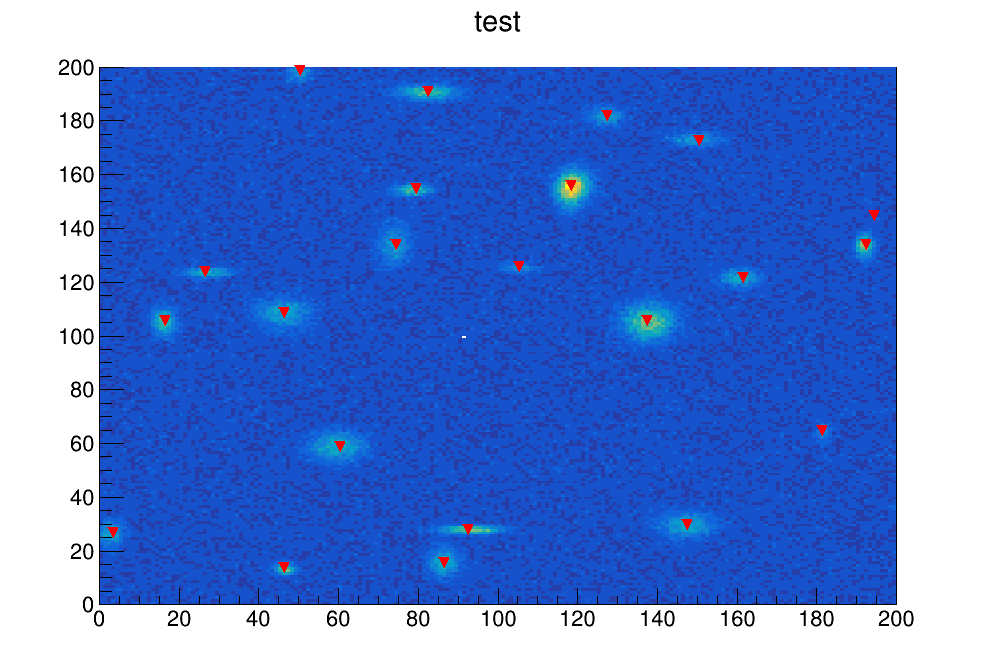

In [6]:
gROOT->GetListOfCanvases()->Draw()